This notebook is to look at a dataset of the Pima indians of Arizona, which follows whether the persons were to develop clinical diabetes.
- Data is graphically modeled
- Data is prepared for training
- A logistic regression is applied, achieving 78% accuracy with the test dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('diabetes.csv')
df = pima

df.head()
#An outcome of '0' indicates non-diabetic, and '1' indicates diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [41]:
# Let's add a column to say if the people are overweight
df["Overweight"] = [1 if x > 25 else 0 for x in df.BMI]

# Let's add a column to say if the people are obese
df["Obese"] = [1 if x > 30 else 0 for x in df.BMI]

# Let's add a column to say if the people have high glucose
df["HighGlucose"] = [1 if x > 140 else 0 for x in df.Glucose]

# Let's add a column to say if the people are older
df["Older"] = [1 if x > 41 else 0 for x in df.Age]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight,Obese,HighGlucose,Older
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0,0,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,1,0,0


In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight,Obese,HighGlucose,Older
Pregnancies,1,0.129459,0.141282,-0.0816718,-0.0735346,0.0176831,-0.0335227,0.544341,0.221898,0.076904,0.0498827,0.119437,0.448593
Glucose,0.129459,1,0.15259,0.0573279,0.331357,0.221071,0.137337,0.263514,0.466581,0.197343,0.201197,0.784537,0.175182
BloodPressure,0.141282,0.15259,1,0.207371,0.0889334,0.281805,0.0412649,0.239528,0.0650684,0.180051,0.206862,0.133654,0.230391
SkinThickness,-0.0816718,0.0573279,0.207371,1,0.436783,0.392573,0.183928,-0.11397,0.0747522,0.291517,0.342342,0.0856359,-0.0895876
Insulin,-0.0735346,0.331357,0.0889334,0.436783,1,0.197859,0.185071,-0.042163,0.130548,0.155255,0.201996,0.281137,-0.0133565
BMI,0.0176831,0.221071,0.281805,0.392573,0.197859,1,0.140647,0.0362419,0.292695,0.626199,0.732332,0.215031,0.0267085
DiabetesPedigreeFunction,-0.0335227,0.137337,0.0412649,0.183928,0.185071,0.140647,1,0.0335613,0.173844,0.0859377,0.0950749,0.106425,0.0177833
Age,0.544341,0.263514,0.239528,-0.11397,-0.042163,0.0362419,0.0335613,1,0.238356,0.0624203,0.0580282,0.240446,0.832758
Outcome,0.221898,0.466581,0.0650684,0.0747522,0.130548,0.292695,0.173844,0.238356,1,0.252671,0.294751,0.410072,0.189892
Overweight,0.076904,0.197343,0.180051,0.291517,0.155255,0.626199,0.0859377,0.0624203,0.252671,1,0.540976,0.170132,0.0302056


In [43]:
# Stronger correlations between outcome and Glucose/BMI.  Higher BMI agree better with diabetes.

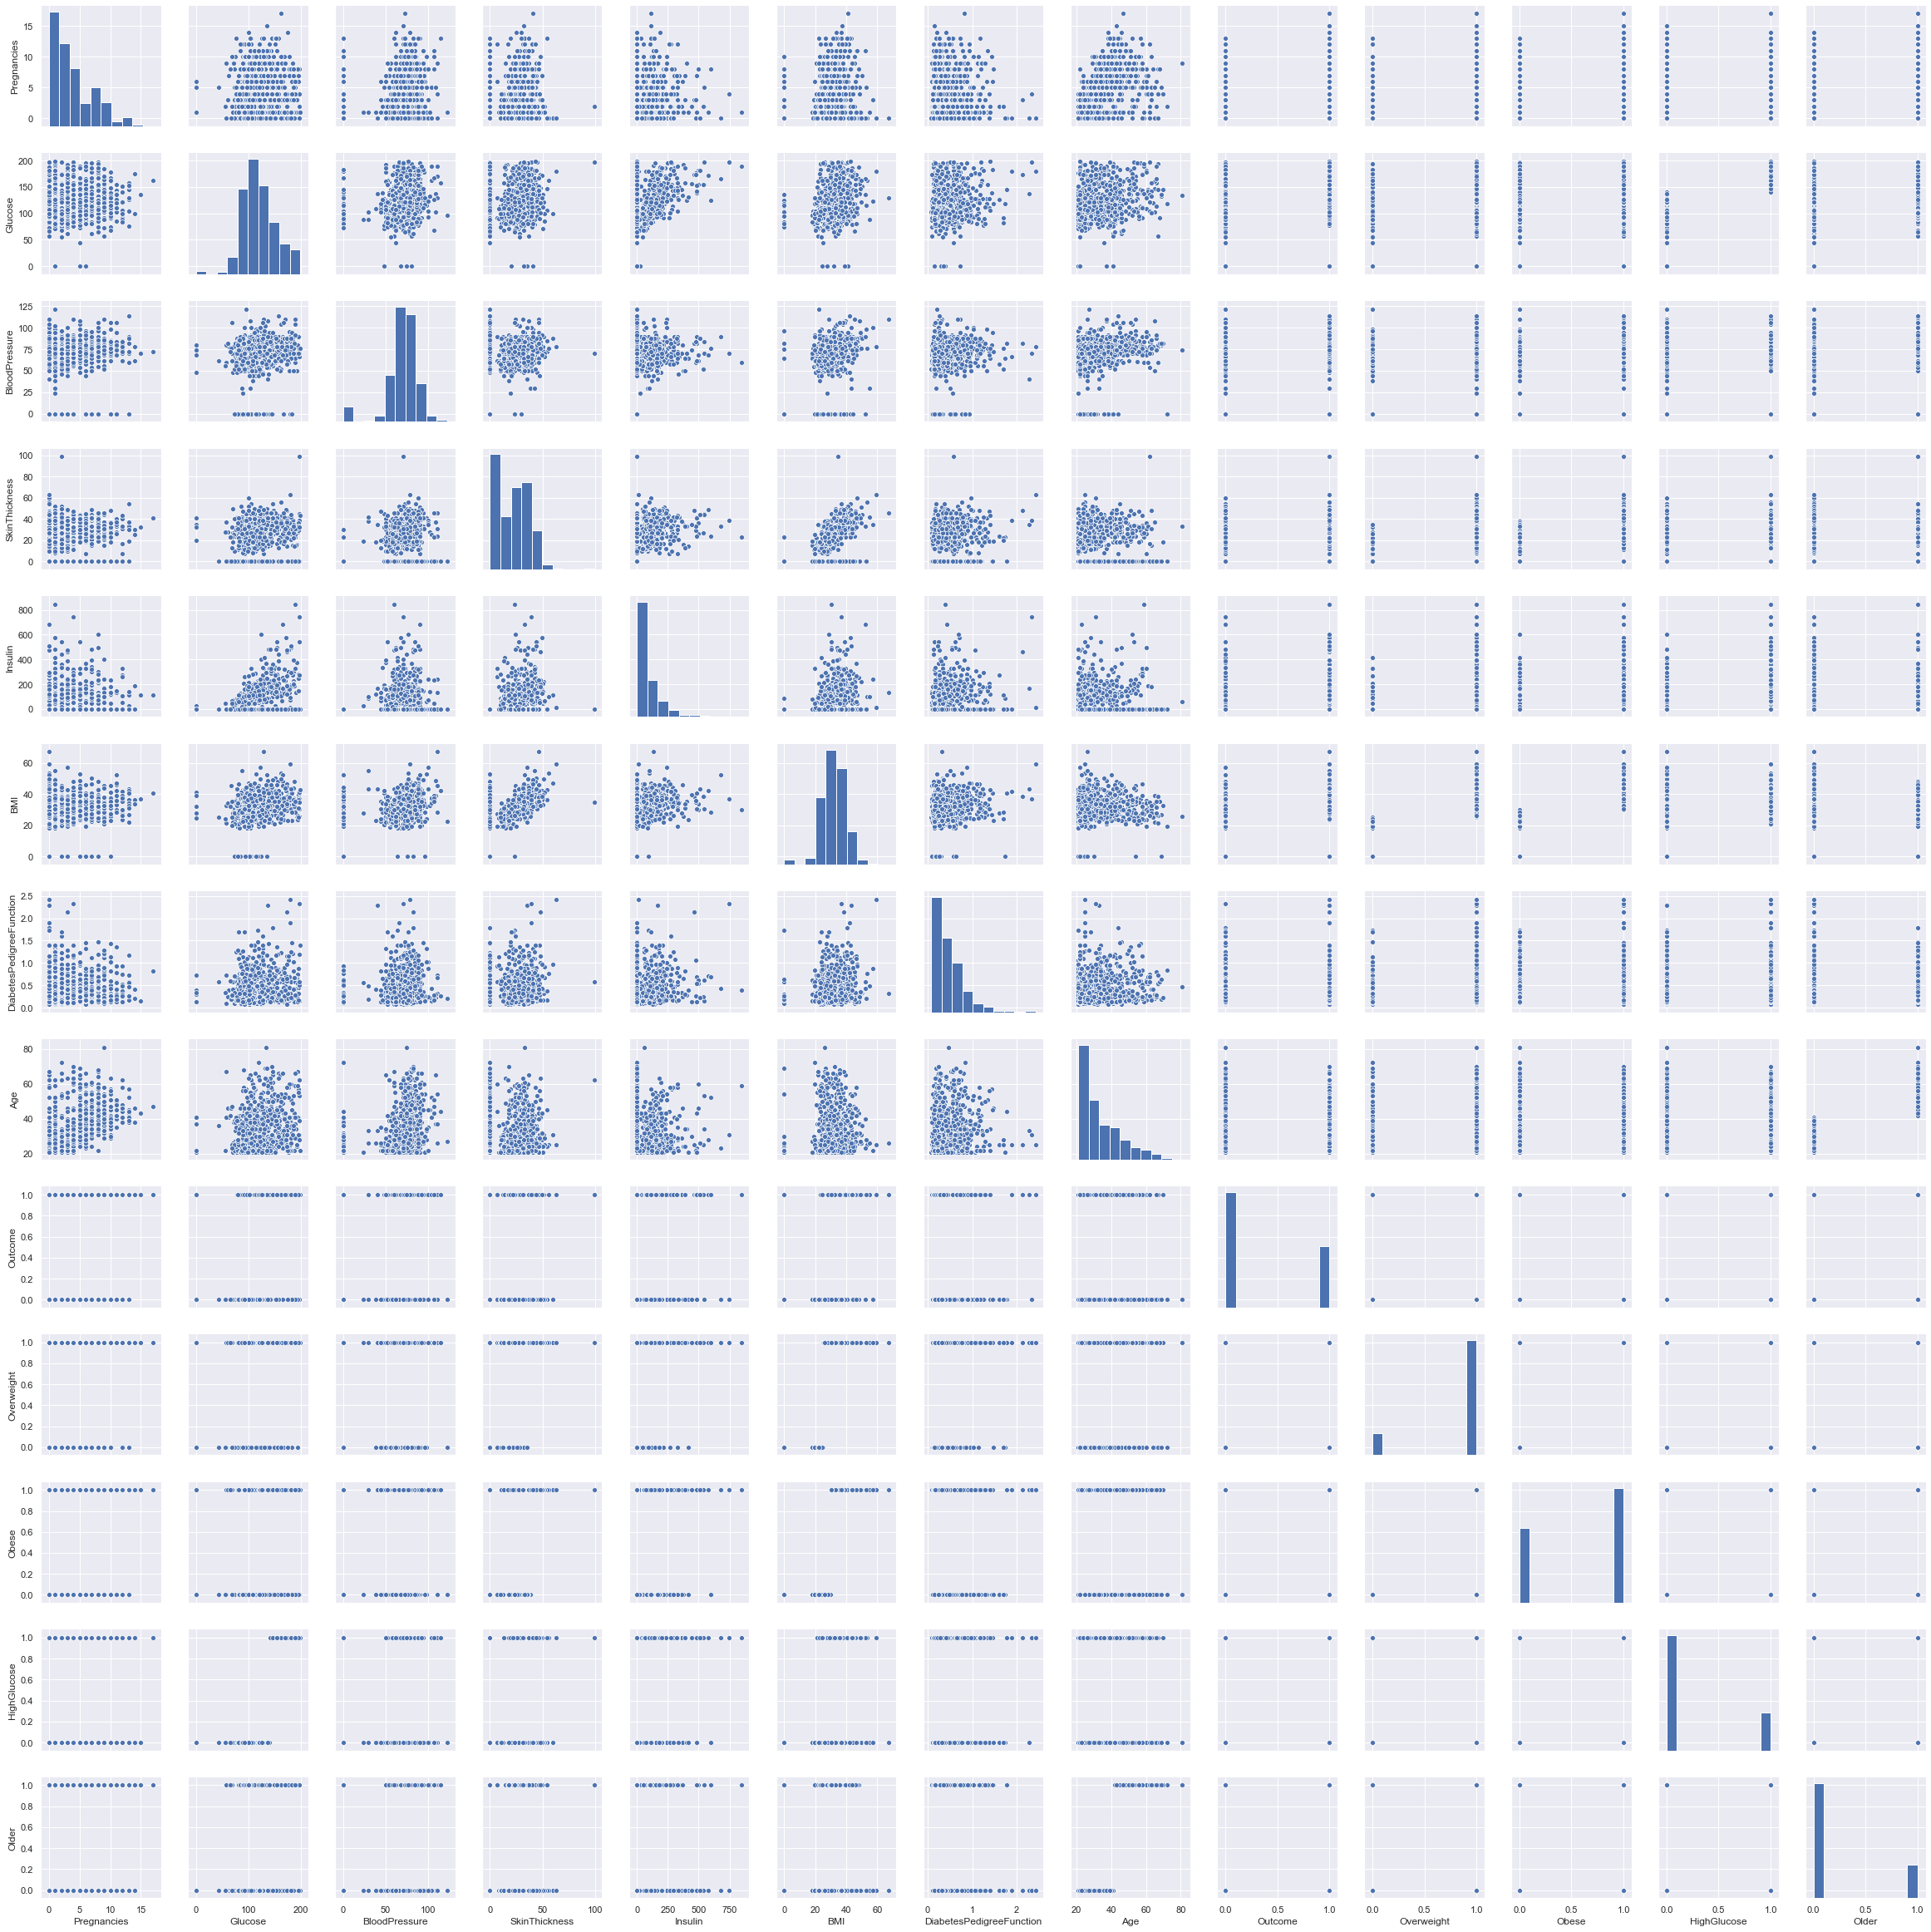

In [44]:
#scatterplot
sns.set()
sns.pairplot(df, height= 2.5)
plt.show();

In [45]:
#Prepare for machine learning

In [46]:
# Dependent and independent variables
Y = df.Outcome
x = df.drop('Outcome', axis = 1)
columns = x.columns

scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [47]:
# Training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 25)

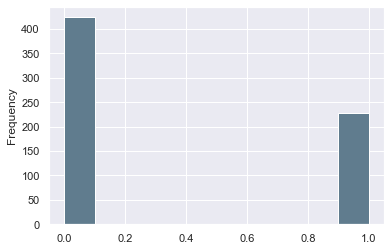

In [48]:
# Display the differences in 0s and 1s in y_train 
y_train.plot.hist(grid=True, bins=10, width=0.1,
                   color='#607c8e')

In [49]:
# Because of the large imbalance in the size of the groups SMOTE will be used to better balance the numbers
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([424, 424], dtype=int64)

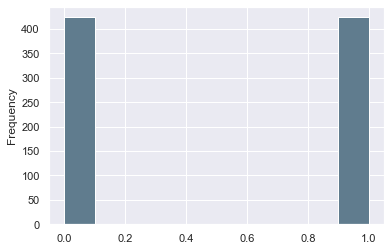

In [50]:
# Display the differences in 0s and 1s in y_train after SMOTE 
y_train.plot.hist(grid=True, bins=10, width=0.1,
                   color='#607c8e')

In [51]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [52]:
# This means that with a simple logistic Regression, the model was able to predict if someone would develop clinical 
# diabetes.  This can be improved and further model development will be applied to improve the statistics.